# data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pdb
import matplotlib
import seaborn as sns

In [19]:
url = './data/beijing.csv'
data = pd.read_csv(url, sep=',', index_col='time')
data.index = pd.to_datetime(data.index)

In [3]:
load = data.load

## draw load

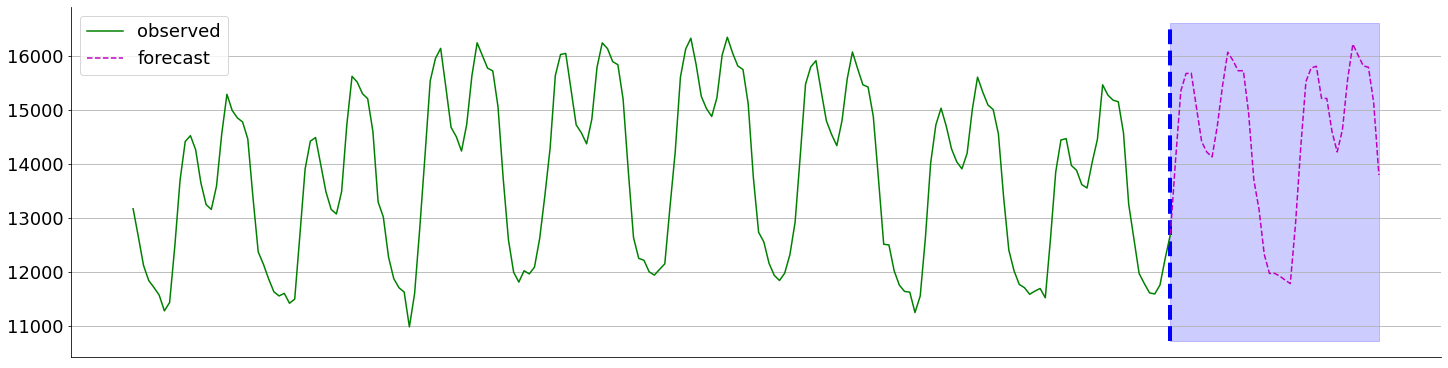

In [4]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(20, 5), constrained_layout=True)
gspec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = plt.subplot(gspec[0, 0])
range_observed = [i for i in range(200)]
plt.plot(range_observed,
         load.values[range_observed],
         color='g',
         label='observed')
range_forecast = [i for i in range(199, 240)]
plt.plot(range_forecast,
         load.values[range_forecast],
         color='m',
         linestyle='dashed',
         label='forecast')
ymin, ymax = plt.ylim()
plt.fill_between(x=range_forecast, y1=ymax, y2=ymin, alpha=0.2, color='b')
plt.vlines(range_forecast[0], ymin, ymax, color='b', linestyles='dashed', linewidth=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([])
plt.legend(loc='upper left')
plt.grid(True)

## draw climate features

Text(0.5, 1.0, 'Apparent Temperature')

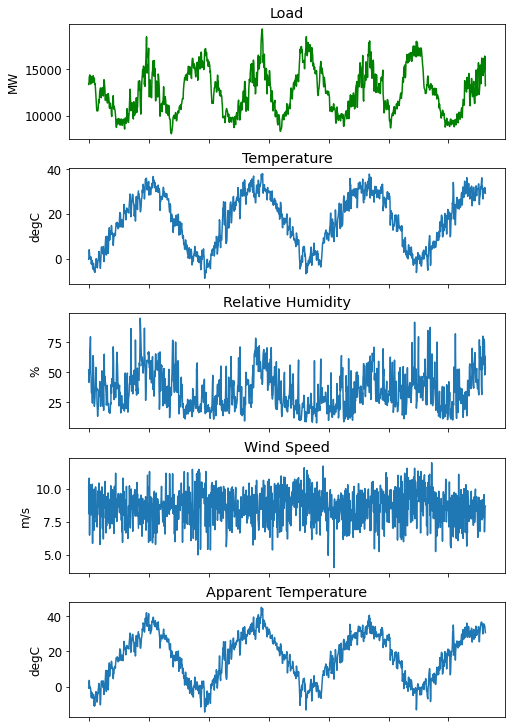

In [27]:
# 绘制平均负荷以及各影响因素曲线
data = data.resample('D').mean()
matplotlib.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(7, 10), constrained_layout=True)
gspec = gridspec.GridSpec(ncols=1, nrows=5, figure=fig)
ax = plt.subplot(gspec[0, 0])
x = [i for i in range(len(data))]
# sns.lineplot(x='time', y='load', data=data, ax=ax, color='k')
plt.plot(x, data.load, color='g')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('MW')
ax.set_title('Load')

ax = plt.subplot(gspec[1, 0])
# sns.lineplot(x='time', y='tem', data=data, ax=ax, color='k')
plt.plot(x, data.tem)
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('degC')
ax.set_title('Temperature')

ax = plt.subplot(gspec[2, 0])
# sns.lineplot(x='time', y='hum', data=data, ax=ax, color='k')
plt.plot(x, data.hum)
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('%')
ax.set_title('Relative Humidity')

ax = plt.subplot(gspec[3, 0])
# sns.lineplot(x='time', y='win', data=data, ax=ax, color='k')
plt.plot(x, data.win)
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('m/s')
ax.set_title('Wind Speed')

ax = plt.subplot(gspec[4, 0])
# sns.lineplot(x='time', y='tembody', data=data, ax=ax, color='k')
plt.plot(x, data.tembody)
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('degC')
ax.set_title('Apparent Temperature')


## workday

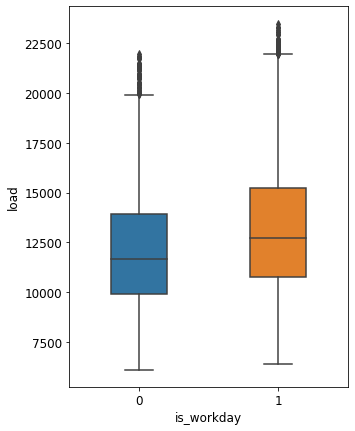

In [34]:
url = './data/beijing.csv'
data = pd.read_csv(url, sep=',', index_col='time')
data.index = pd.to_datetime(data.index)

data['is_workday'] = data.is_workday.astype('int')
plt.figure(figsize=(5,7))
g = sns.boxplot(x='is_workday', y='load', width=0.4, data=data)

## month

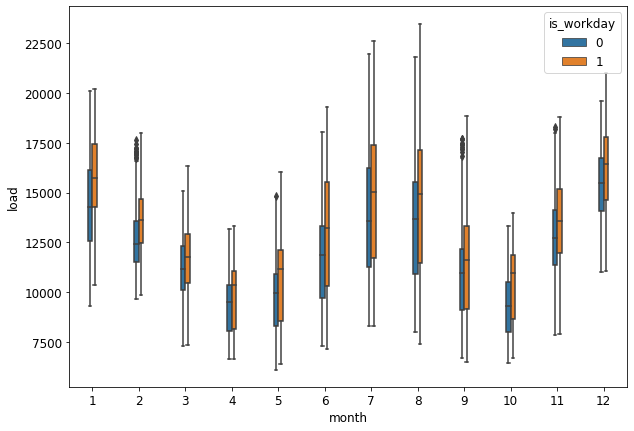

In [36]:
url = './data/beijing.csv'
data = pd.read_csv(url, sep=',', index_col='time')
data.index = pd.to_datetime(data.index)

data['month'] = data.month.astype('int')
plt.figure(figsize=(10,7))
g = sns.boxplot(x='month', y='load', hue='is_workday',width=0.2, data=data)

## residual error

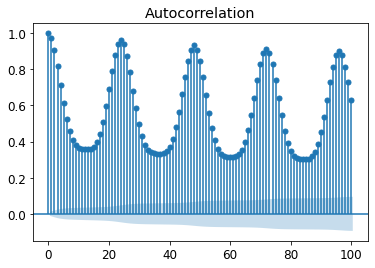

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.load, lags=100);

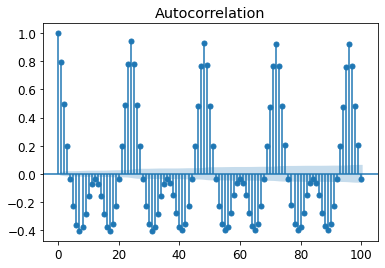

In [50]:
load_residual = data.load.diff(1).dropna()
plot_acf(load_residual, lags=100);

In [53]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31659 entries, 2017-01-01 00:00:00 to 2020-08-16 23:00:00
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wea           31659 non-null  float64
 1   tem           31659 non-null  float64
 2   hum           31659 non-null  float64
 3   win           31659 non-null  float64
 4   dir           31659 non-null  float64
 5   winclass      31659 non-null  float64
 6   tembody       31659 non-null  float64
 7   year          31659 non-null  int64  
 8   month         31659 non-null  int64  
 9   day           31659 non-null  int64  
 10  hour          31659 non-null  int64  
 11  day_of_year   31659 non-null  int64  
 12  week_of_year  31659 non-null  int64  
 13  day_of_week   31659 non-null  int64  
 14  is_workday    31659 non-null  int64  
 15  load          31659 non-null  float64
dtypes: float64(8), int64(8)
memory usage: 4.1 MB
